### Top&Bottom Mappings

In [4]:
category_dict = {
    "top":      1,
    "bottom":   2, 
    "shoes":    3,
    "onepiece": 4   # ignored in the MVP version
}

formality_dict = {
    "formality":3,
    "casual":2, 
    "sport":1
}

weather_dict = {
    "cold":3,
    "sunny":2, 
    "rainny":1
}

type_dict = {    # category, formality, weather
"Anorak" :        (1, 1, 3),
"Blazer":         (1, 3, 2),
"Blouse":         (1, 2, 2),
"Bomber" :        (1, 2, 3),
"Button-Down":    (1, 2, 2 ),
"Cardigan" :      (1, 2, 3),
"Flannel" :       (1, 2, 3),
"Halter":         (1,2,2),
"Henley" :        (1, 2,3),
"Hoodie" :        (1, 2, 3),
"Jacket" :        (1, 2, 3),
"Jersey"  :       (1, 1, 2),
"Parka"   :       (1,2,3),
"Peacoat" :       (1,3,3),
"Poncho" :        (1,2,3),
"Sweater"  :      (1,2,3),
"Tank" :          (1,3,2),
"Tee" :           (1,2,2),
"Top"  :          (1,2,2),
"Turtleneck" :    (1,3,3),
"Capris" :        (2,2,2),
"Chinos"  :       (2,2,2),
"Culottes"  :     (2,2,2),
"Cutoffs" :       (2,2,2),
"Gauchos"  :      (2,2,2),
"Jeans" :         (2,2,2),
"Jeggings" :      (2,2,2),
"Jodhpurs"  :     (2,1,2),
"Joggers"  :      (2,1,3),
"Leggings"  :     (2,1,2),
"Sarong"  :       (2,2,2),
"Shorts"  :       (2,2,2),
"Skirt"   :       (2, 2,2),
"Sweatpants" :    (2, 1, 3),
"Sweatshorts" :   (2, 1, 2 ),
"Trunks"       :  (2, 1, 2),
"Caftan"       :  (4,3,2),
"Cape"         :  (4,3,3),
"Coat"         :  (4, 3, 3),
"Coverup"      :  (4, 2, 2),
"Dress"        :  (4, 2, 2),
"Jumpsuit"     :  (4, 2, 2),
"Kaftan"        : (4, 3, 2),
"Kimono"         :(4, 3, 2),
"Nightdress"     :(4, 2, 2),
"Onesie"         :(4, 2, 2),
"Robe"           :(4, 2, 2),
"Romper"       :  (4, 2, 2),
"Shirtdress"    : (4, 2, 2),
"Sundress"     :  (4, 2, 2),
"boots":(3, 2, 3) ,
"flip_flops":(3, 2, 3),
"loafers":(3, 3, 2),
"sandals":(3, 2, 2),
"sneakers":(3, 2, 2),
"soccer_shoes":(3,1,2)}

### Weather/Formality Combinations

In [5]:
import itertools
import numpy as np

type_test = ["top","bottom", "shoes"]
f_test = ["formality","casual", "sport"]
w_test = ["cold","sunny", "rainny"]
filters = list(itertools.product(type_test, f_test, w_test))
filters

[('top', 'formality', 'cold'),
 ('top', 'formality', 'sunny'),
 ('top', 'formality', 'rainny'),
 ('top', 'casual', 'cold'),
 ('top', 'casual', 'sunny'),
 ('top', 'casual', 'rainny'),
 ('top', 'sport', 'cold'),
 ('top', 'sport', 'sunny'),
 ('top', 'sport', 'rainny'),
 ('bottom', 'formality', 'cold'),
 ('bottom', 'formality', 'sunny'),
 ('bottom', 'formality', 'rainny'),
 ('bottom', 'casual', 'cold'),
 ('bottom', 'casual', 'sunny'),
 ('bottom', 'casual', 'rainny'),
 ('bottom', 'sport', 'cold'),
 ('bottom', 'sport', 'sunny'),
 ('bottom', 'sport', 'rainny'),
 ('shoes', 'formality', 'cold'),
 ('shoes', 'formality', 'sunny'),
 ('shoes', 'formality', 'rainny'),
 ('shoes', 'casual', 'cold'),
 ('shoes', 'casual', 'sunny'),
 ('shoes', 'casual', 'rainny'),
 ('shoes', 'sport', 'cold'),
 ('shoes', 'sport', 'sunny'),
 ('shoes', 'sport', 'rainny')]

In [6]:

rate = [1, 2, 3, 4, 5]
formality = ["formality","casual", "sport"]
weather = ["cold","sunny", "rainny"]
filters = list(itertools.product(formality, weather))
filters

[('formality', 'cold'),
 ('formality', 'sunny'),
 ('formality', 'rainny'),
 ('casual', 'cold'),
 ('casual', 'sunny'),
 ('casual', 'rainny'),
 ('sport', 'cold'),
 ('sport', 'sunny'),
 ('sport', 'rainny')]

### User's Top&Bottom Combinations

In [7]:
import pandas as pd
df = pd.read_csv("/home/repos/hack/FastFit_AI/mockups/garment.csv")
df.head()

,id,user_id,img_path,garment_type,garment_category,formality,weather
0,1,1,http://dummyimage.com/100x100.png/cc0000/ffffff,1,1,1,1
1,2,2,http://dummyimage.com/100x100.png/dddddd/000000,2,2,2,2
2,3,3,http://dummyimage.com/100x100.png/cc0000/ffffff,3,3,3,3
3,4,4,http://dummyimage.com/100x100.png/5fa2dd/ffffff,4,4,1,1
4,5,5,http://dummyimage.com/100x100.png/ff4444/ffffff,5,1,2,2


In [8]:
user_id = 1
user_closet = df[(df["garment_type"]!=4)] #df[(df["id"]==user_id) & (df["id"]==user_id)]

outfit = pd.DataFrame()
for formality, weather in filters:
    closet_filtered = user_closet[(user_closet["formality"] == formality_dict[formality])&(user_closet["weather"] == weather_dict[weather])]
    print(formality, weather, len(closet_filtered))
    top = list(closet_filtered[closet_filtered["garment_type"]== 1]["id"].unique())
    bottom = list(closet_filtered[closet_filtered["garment_type"]== 2]["id"].unique())
    shoes = list(closet_filtered[closet_filtered["garment_type"]== 3]["id"].unique())
    current = pd.DataFrame(list(itertools.product(top, bottom, shoes)), columns=['top', 'bottom', 'shoes'])
    current["formality"] =  formality
    current["weather"] =  weather
    outfit = pd.concat([outfit, current])

outfit['user_rate'] = np.random.choice(list(rate), len(outfit))
outfit

formality cold 326
formality sunny 0
formality rainny 0
casual cold 0
casual sunny 327
casual rainny 0
sport cold 0
sport sunny 0
sport rainny 327


,top,bottom,shoes,formality,weather,user_rate
0,51,102,3,formality,cold,3
1,51,102,153,formality,cold,2
2,51,102,303,formality,cold,3
3,51,102,453,formality,cold,1
4,51,102,603,formality,cold,3
...,...,...,...,...,...,...
289,901,952,253,sport,rainny,5
290,901,952,403,sport,rainny,3
291,901,952,553,sport,rainny,3
292,901,952,703,sport,rainny,3


In [9]:
from typing import Tuple
import uuid
from PIL import Image

def image_joiner(image_triplet: Tuple ): 
    images_list = image_triplet
    imgs = [Image.open(i) for i in images_list]

    # If you're using an older version of Pillow, you might have to use .size[0] instead of .width
    # and later on, .size[1] instead of .height
    min_img_width = min(i.width for i in imgs)

    total_height = 0
    for i, img in enumerate(imgs):
        # If the image is larger than the minimum width, resize it
        if img.width > min_img_width:
            imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)
        total_height += imgs[i].height

    # I have picked the mode of the first image to be generic. You may have other ideas
    # Now that we know the total height of all of the resized images, we know the height of our final image
    img_merge = Image.new(imgs[0].mode, (min_img_width, total_height))
    y = 0
    for img in imgs:
        img_merge.paste(img, (0, y))

        y += img.height
    unique_filename = str(uuid.uuid4())
    img_merge.save(unique_filename + ".jpg")
    return unique_filename

In [10]:
#outfit['outfit'] = outfit.apply(lambda x: image_joiner(x['top'], x['bottom'], x['shoes']),axis=1)
#outfit    
    #image_joiner(("tshirt.jfif", "hmgoepprod.jfif", "descarga.jfif"))

In [11]:
list_gar = [ ("shirts1.jpg",    "pants2.jpg","shoes1.jpg", "1", "2"),
             ("shirts1.jpg",    "pants2.jpg","shoes1.jpg", "1", "2"),
             ("shirts3.jpg",    "pants3.jpg","shoes3.jpg", "2", "3"),
             ("shirts3.jpg",    "pants4.jpg","shoes4.jpg", "2", "3"),
             ("shirts3.jpg",    "pants5.jpg","shoes4.jpg", "3", "1"),
              ("shirts1.jpg",    "pants2.jpg","shoes1.jpg", "1", "2"),
             ("shirts1.jpg",    "pants2.jpg","shoes1.jpg", "1", "2"),
             ("shirts3.jpg",    "pants3.jpg","shoes3.jpg", "2", "3"),
             ("shirts3.jpg",    "pants4.jpg","shoes4.jpg", "2", "3"),
             ("shirts3.jpg",    "pants5.jpg","shoes4.jpg", "3", "1"),
             ("shirts1.jpg",    "pants2.jpg","shoes1.jpg", "1", "2"),
             ("shirts1.jpg",    "pants2.jpg","shoes1.jpg", "1", "2"),
             ("shirts3.jpg",    "pants3.jpg","shoes3.jpg", "2", "3"),
             ("shirts3.jpg",    "pants4.jpg","shoes4.jpg", "2", "3"),
             ("shirts3.jpg",    "pants5.jpg","shoes4.jpg", "3", "1"),
              ("shirts1.jpg",    "pants2.jpg","shoes1.jpg", "1", "2"),
             ("shirts1.jpg",    "pants2.jpg","shoes1.jpg", "1", "2"),
             ("shirts3.jpg",    "pants3.jpg","shoes3.jpg", "2", "3"),
             ("shirts3.jpg",    "pants4.jpg","shoes4.jpg", "2", "3"),
             ("shirts3.jpg",    "pants5.jpg","shoes4.jpg", "3", "1")]
 
train_df = pd.DataFrame(list_gar, columns=['top', 'bottom', 'shoes', "formal", "weather"])
train_df['outfit'] = train_df.apply(lambda x: image_joiner((x['top'], x['bottom'], x['shoes'])),axis=1)
train_df['user_rate'] = np.random.choice(list(rate), len(train_df))

train_df

/tmp/ipykernel_1935/474747985.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  imgs[i] = img.resize((min_img_width, int(img.height / img.width * min_img_width)), Image.ANTIALIAS)


,top,bottom,shoes,formal,weather,outfit,user_rate
0,shirts1.jpg,pants2.jpg,shoes1.jpg,1,2,27139dc3-5a1b-4719-b182-9f1b5406e2d0,3
1,shirts1.jpg,pants2.jpg,shoes1.jpg,1,2,8573f0df-2661-4cad-ae14-39cdbd6f118f,2
2,shirts3.jpg,pants3.jpg,shoes3.jpg,2,3,be0f180e-c792-414b-b236-07e675423c3e,4
3,shirts3.jpg,pants4.jpg,shoes4.jpg,2,3,a41c761c-02f1-48fc-afcf-fd29d40676c0,4
4,shirts3.jpg,pants5.jpg,shoes4.jpg,3,1,300e50a5-174d-4826-abe1-676ac83194c1,1
5,shirts1.jpg,pants2.jpg,shoes1.jpg,1,2,ba986d48-60c4-4317-9b98-70d55f8cc5b8,2
6,shirts1.jpg,pants2.jpg,shoes1.jpg,1,2,47f1228e-d095-4e07-ac4a-5ed70b29d2ec,4
7,shirts3.jpg,pants3.jpg,shoes3.jpg,2,3,117bf41a-1b2d-4a1c-b66b-ae3a8324fac1,5
8,shirts3.jpg,pants4.jpg,shoes4.jpg,2,3,34dd0981-6755-4185-a174-a9d18be6b24b,3
9,shirts3.jpg,pants5.jpg,shoes4.jpg,3,1,83340424-a22e-4675-9152-e350ba8f9b49,3


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   top        20 non-null     object
 1   bottom     20 non-null     object
 2   shoes      20 non-null     object
 3   formal     20 non-null     object
 4   weather    20 non-null     object
 5   outfit     20 non-null     object
 6   user_rate  20 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ KB


In [13]:
!pip install fastai==1.0.61
!pip install image_tabular

In [27]:
from fastai.vision import *
from fastai.tabular import *
from image_tabular.core import *
from image_tabular.dataset import *
from image_tabular.model import *
from image_tabular.metric import *

In [15]:
tfms = get_transforms(flip_vert=True)
size = 128

In [16]:
train_df["user_rate"].value_counts()

4    7
3    4
2    4
5    3
1    2
Name: user_rate, dtype: int64

In [17]:
val_idx = get_valid_index(train_df)
len(val_idx)

4

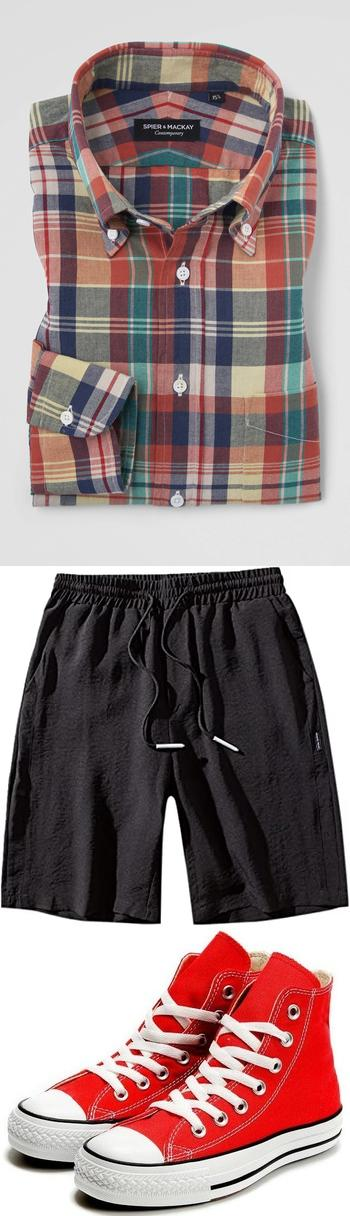

In [18]:
val_idx = get_valid_index(train_df[["formal",	"weather",	"outfit", 	"user_rate"]])
data_path = Path(".")
mage_data = (ImageList.from_df(train_df[["formal",	"weather",	"outfit", 	"user_rate"]], path=data_path, cols="outfit"#, folder="outfitjpg"
                               , suffix=".jpg")
              .split_by_idx(val_idx).label_from_df(cols="user_rate"))
              #.transform(tfms, size=size))
mage_data.train[2][0]

In [19]:
dep_var = 'outfit'
cat_names = ['formal', 'weather']
#cont_names = ['age_approx']
procs = [FillMissing, Categorify, Normalize]

In [20]:
tab_data = (TabularList.from_df(train_df, path=data_path, cat_names=cat_names, procs=procs) # cont_names=cont_names)
                           .split_by_idx(val_idx)
                           .label_from_df(cols=dep_var))
tab_data.train[0]


/home/repos/hack/FastFit_AI/env2/lib/python3.8/site-packages/fastai/tabular/transform.py:139: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,n] = df.loc[:,n].astype('category').cat.as_ordered()
/home/repos/hack/FastFit_AI/env2/lib/python3.8/site-packages/fastai/tabular/transform.py:139: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,n] = df.loc[:,n].astype('category').cat.as_ordered()
/home/repos/hack/FastFit_AI/env2/lib/python3.8/site-packages/fastai/tabular/transform.py:145: FutureWarning: In a future version, `df.iloc[:, i] = newva

(TabularLine [tensor([1, 2]), tensor(0)], Category 2)

In [21]:
integrate_train, integrate_test = get_imagetabdatasets(mage_data, tab_data)

In [22]:
bs = 64

db = DataBunch.create(integrate_train, integrate_test,
                      path=data_path, bs=bs)
db

DataBunch;

Train: <image_tabular.dataset.ImageTabDataset object at 0x7f2e2eee5ee0>;

Valid: <image_tabular.dataset.ImageTabDataset object at 0x7f2e2eee5d30>;

Test: None

In [23]:
db.norm, db.denorm = normalize_funcs_image_tab(*imagenet_stats)
db.add_tfm(db.norm)

In [24]:
# cnn model for images, use Resnet50 as an example
cnn_arch = models.resnet50

# cnn_out_sz is the output size of the cnn model that will be concatenated with tabular model output
cnn_out_sz = 256

# use fastai functions to get a cnn model
image_data_db = mage_data.databunch()
image_data_db.c = cnn_out_sz
cnn_learn = cnn_learner(image_data_db, cnn_arch, ps=0.2)
cnn_model = cnn_learn.model

/home/repos/hack/FastFit_AI/env2/lib/python3.8/site-packages/fastai/basic_data.py:247: UserWarning: Your training dataloader is empty, you have only 16 items in your training set.
                 Your batch size is 64, you should lower it.
  warn(f"""Your training dataloader is empty, you have only {len(self.train_dl.dataset)} items in your training set.


You can deactivate this warning by passing `no_check=True`.


In [25]:
# get embedding sizes of categorical data
emb_szs = tab_data.train.get_emb_szs()

# output size of the tabular model that will be concatenated with cnn model output
tab_out_sz = 8

# use fastai functions to get a tabular model
tabular_model = TabularModel(emb_szs, 0, out_sz=tab_out_sz, layers=[8], ps=0.2)
tabular_model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=8, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=8, out_features=8, bias=True)
  )
)

In [28]:
integrate_model = CNNTabularModel(cnn_model,
                                  tabular_model,
                                  layers = [cnn_out_sz + tab_out_sz, 32],
                                  ps=0.2,
                                  out_sz=2).to("cuda")

In [ ]:
weights = [1/(1-train_df["user_rate"].mean()), 1/train_df["user_rate"].mean()]
loss_func = CrossEntropyFlat(weight=torch.FloatTensor(weights).to("cuda"))

In [ ]:
learn = Learner(db, integrate_model, metrics=[accuracy, ROCAUC()], loss_func=loss_func)
learn.layer_groups = [nn.Sequential(*flatten_model(cnn_learn.layer_groups[0])),
                      nn.Sequential(*flatten_model(cnn_learn.layer_groups[1])),
                      nn.Sequential(*(flatten_model(cnn_learn.layer_groups[2]) +
                                      flatten_model(integrate_model.tabular_model) +
                                      flatten_model(integrate_model.layers)))]

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

NameError: name 'learn' is not defined

In [ ]:
learn.fit_one_cycle(10, 1e-4)
